In [1]:
import numpy as np
from scipy import linalg as la
from os import walk
import os
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from random import sample
import random
from tqdm import tqdm

%matplotlib inline

In [2]:
#dataset taken from http://cswww.essex.ac.uk/mv/allfaces/faces94.html
IMAGES_PATH = "./faces94"

In [3]:
def plot(img, w=200, h=180):
    plt.imshow(img.reshape((w,h)), cmap='gray', interpolation='nearest')
    plt.show()

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [5]:
def readImage(path):
    return rgb2gray(imread(path)).ravel()

In [6]:
def read_data(path):
    trainSet = []
    trainLabels = []
    testSet = []
    testLabels = []
    for (dirpath, dirnames, filenames) in walk(path):
        if filenames:
            lable_name = dirpath[dirpath.rfind("/")+1:]
            files_shuffle = [os.path.join(dirpath, filename) for filename in filenames if filename.endswith("jpg")]
            random.shuffle(files_shuffle)
            train_img = files_shuffle[0]
            test_imgs = files_shuffle[1:]
            trainSet.append(readImage(train_img))
            trainLabels.append(lable_name)
            testSet = testSet + [readImage(img) for img in test_imgs]
            testLabels = testLabels + [lable_name for _ in test_imgs]
    return np.transpose(trainSet), trainLabels, np.transpose(testSet), testLabels
trainSet, trainLabels, testSet , testLabels = read_data(IMAGES_PATH)
print trainSet.shape, testSet.shape

(36000, 153) (36000, 2906)


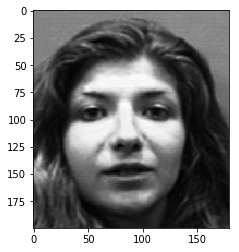

In [7]:
#example grayscale face image from db
plot(trainSet[:, 0])

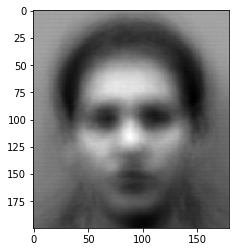

In [8]:
meanImg = np.sum(trainSet, axis=1)/float(trainSet.shape[1])
#plot mean img
plot(meanImg)

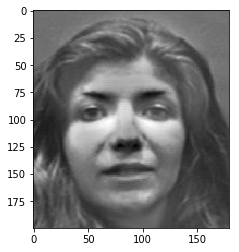

In [9]:
# Image from train dataset whithout mean image 
trainSetWihoutMean =  trainSet - np.vstack(meanImg)
#example image
plot(trainSetWihoutMean[:, 0])

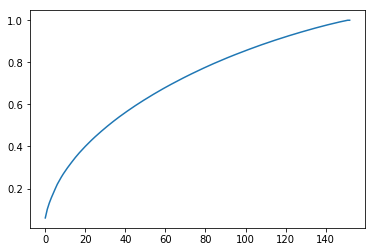

In [10]:
U, s, Vh = la.svd(trainSetWihoutMean, full_matrices=False)
csum = np.cumsum(s)
#distribution of singulr values from biggest to smallest
plt.plot(csum/csum[-1])

#number of principal components 
k=35
new_base = U[:,:k-1].T
#projectin of taining images set on space with base=new_base
trainSetProjection = np.dot(new_base, trainSetWihoutMean)

In [11]:
test_set_size = 100
#sample 100 images from test set 
random_sub_sample = random.sample(range(len(testLabels)), test_set_size)
correct_guesses = 0
for i in tqdm(random_sub_sample):
    test_img = np.array([testSet[:,i]]).T
    correct_label = testLabels[i]

    test_img_diff = test_img - np.vstack(meanImg)
    
    #projection of input image on lower dimension
    test_img_projection = np.dot(new_base, test_img_diff)
    
    guess_index = np.argmin(np.linalg.norm(trainSetProjection - test_img_projection, axis=0))
    guess_label = trainLabels[guess_index]
    
    if correct_label == guess_label:
        correct_guesses += 1

accuracy = 1.0*correct_guesses/test_set_size
        
print "accuracy ", accuracy*100

100%|██████████| 100/100 [00:16<00:00,  6.03it/s]

accuracy  95.0
